# Mapping, Part 2

## Group One

### Power Planet Map

In [91]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline

In [92]:
state = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
state.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [93]:
state = state.to_crs({'init': 'epsg:4326'})

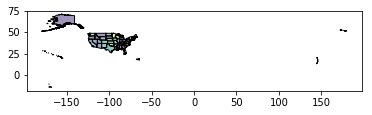

In [94]:
state.plot()

In [95]:
from shapely.geometry import Polygon


bounds = [
         [
            -139.5703125,
            71.63599288330609
          ],
          [
            -138.515625,
            66.51326044311185
          ],
          [
            -132.1875,
            59.712097173322924
          ],
          [
            -123.3984375,
            54.57206165565852
          ],
          [
            -107.57812499999999,
            50.51342652633956
          ],
          [
            -88.9453125,
            51.17934297928927
          ],
          [
            -60.1171875,
            48.922499263758255
          ],
          [
            -60.1171875,
            34.30714385628804
          ],
          [
            -66.4453125,
            25.16517336866393
          ],
          [
            -81.2109375,
            23.885837699862005
          ],
          [
            -92.8125,
            23.885837699862005
          ],
          [
            -116.01562499999999,
            29.84064389983441
          ],
          [
            -178.59375,
            41.77131167976407
          ],
          [
            -190.1953125,
            47.27922900257082
          ],
          [
            -198.98437499999997,
            53.12040528310657
          ],
          [
            -182.109375,
            60.23981116999893
          ],
          [
            -169.45312499999997,
            66.37275500247455
          ],
          [
            -170.15625,
            71.74643171904148
          ],
          [
            -166.2890625,
            74.4021625984244
          ],
          [
            -139.5703125,
            71.07405646336098
          ]
        ]
usa_box = Polygon(bounds)
state = state[state.intersects(usa_box)]

(-180, -60)

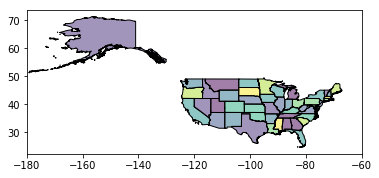

In [96]:
ax = state.plot()
ax.set_xlim([-180,-60])

In [97]:
power_planet = pd.read_csv('powerplants.csv')
power_planet = gpd.GeoDataFrame(power_planet)
power_planet.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300


In [116]:
power_planet['geometry'] = power_planet.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
power_planet.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


In [99]:
power_planet.crs = {'init': 'epsg:4326'}

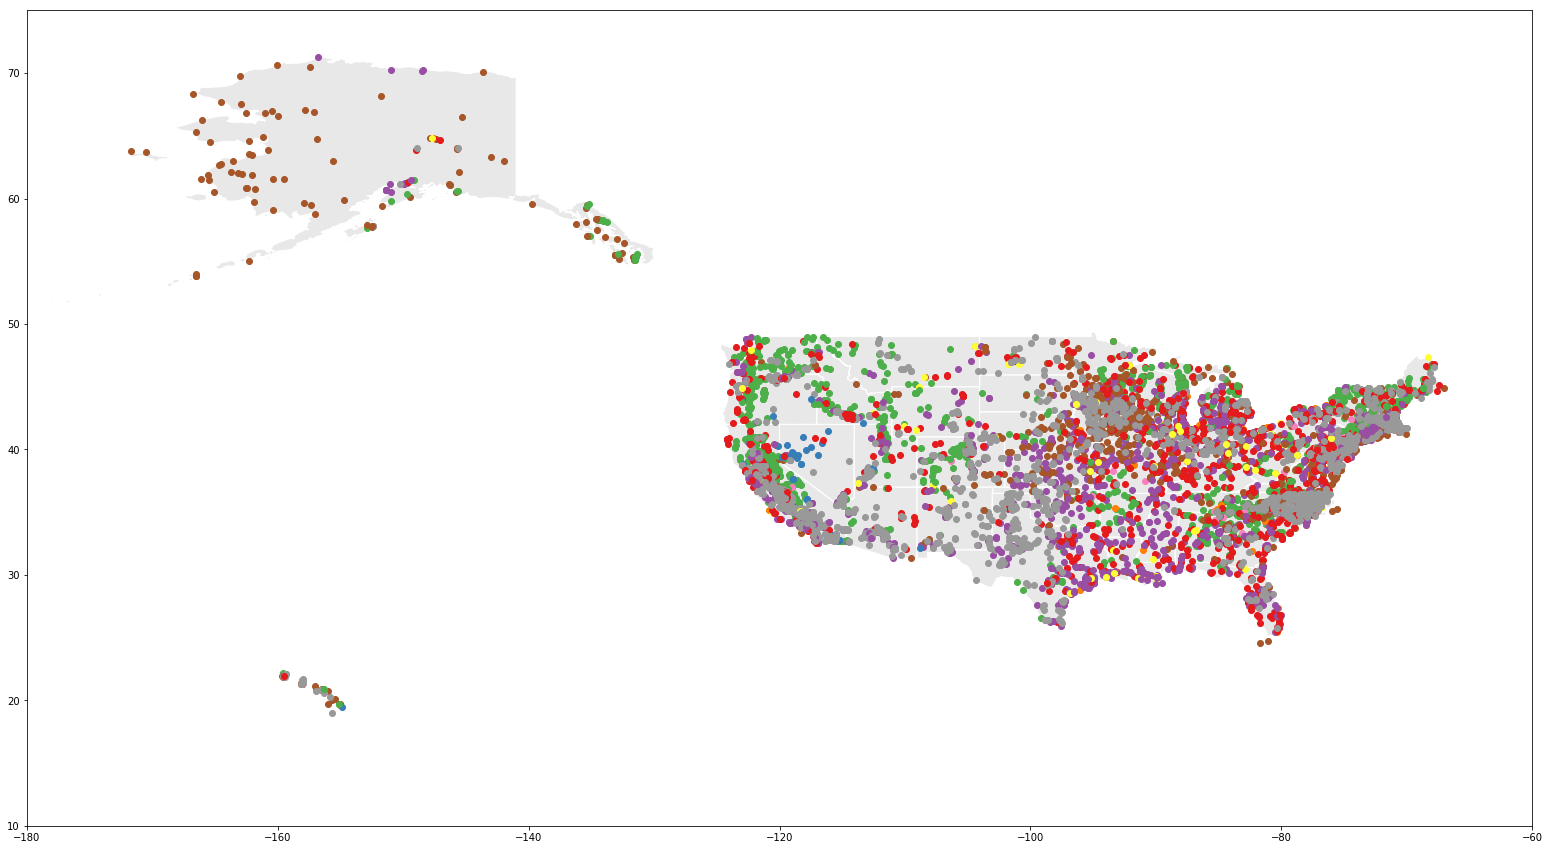

In [124]:
ax = state.plot(color='lightgrey', edgecolor='white', figsize=(40,15))
ax.set_xlim([-180, -60])
ax.set_ylim([10, 75])
#ax.axis('off')
power_planet.plot(column = 'PrimSource', markersize=6, ax=ax)

# Make a map of air quality stations, color coded by average air quality 

In [102]:
air = pd.read_csv('pm25_annual_fixed.csv')
air = gpd.GeoDataFrame(air)
air['geometry'] = air.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
air.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (-87.880258 30.497478)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (-85.803608 33.284928)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (-87.638097 34.762619)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (-85.969858 34.288567)
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (-85.99264699999998 33.991494)


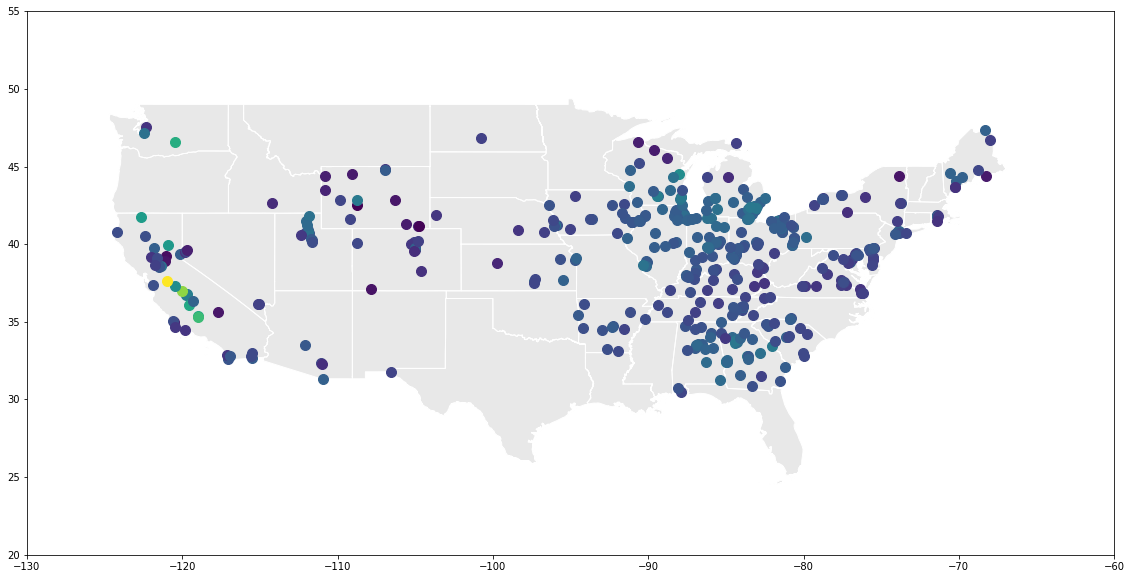

In [121]:
ax = state.plot(color='lightgrey', edgecolor='white', figsize=(20,10))
ax.set_xlim([-130, -60])
ax.set_ylim([20, 55])
#ax.axis('off')
air.plot(column='Arithmetic Mean',  markersize=10, ax=ax)

# Map all of the nuclear power plants in red, with the rest of the plants as dark grey.

In [133]:
nuclear = power_planet[power_planet['PrimSource'] == 'nuclear']
nuclear.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
22,46,Browns Ferry,Tennessee Valley Authority,18642,Electric Utility,Decatur,Limestone,35609,Shaw Rd. PO Box 2000,nuclear,...,0.0,NaN,NaN,Nuclear = 3309.4 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,34.7042,-87.1189,POINT (-87.1189 34.7042)
106,204,Clinton Power Station,Exelon Nuclear,55951,IPP Non-CHP,Clinton,DeWitt,61727,Rt. 54 West,nuclear,...,0.0,NaN,NaN,Nuclear = 1065 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,40.1719,-88.8339,POINT (-88.8339 40.1719)


In [139]:
not_nuc = power_planet[~(power_planet['PrimSource'] == 'nuclear')]
not_nuc.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


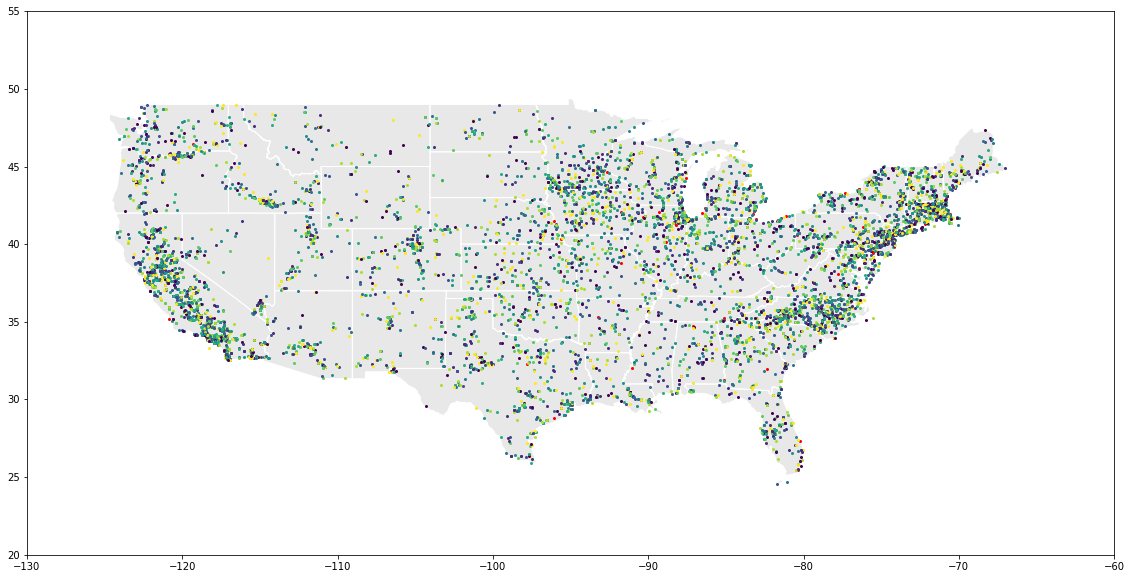

In [141]:
ax = state.plot(color='lightgrey', edgecolor='white', figsize=(20,10))
ax.set_xlim([-130, -60])
ax.set_ylim([20, 55])
nuclear.plot(color='red', ax=ax)
not_nuclear.plot(ax=ax)